# Assignment 7.1 

##### Objective: Reproduce the first example of the lesson 7.3 lecture from ECE517 Machine Learning

#### Importing packages

In [311]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct

#### Generating Training and Test Samples

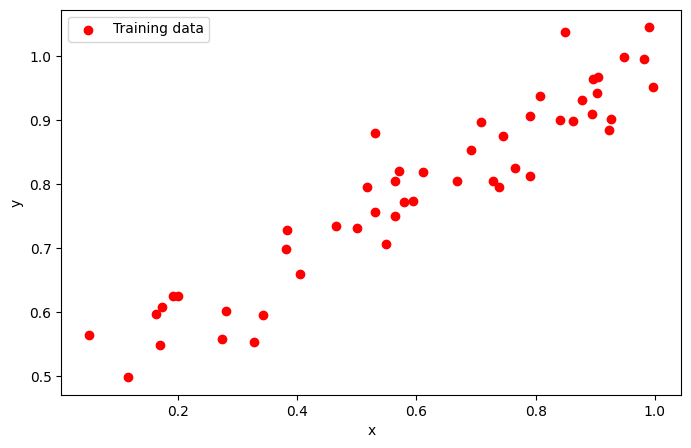

In [312]:
# Function to generate samples from the linear model
def generate_samples(num_samples, sigma):
    X = np.random.rand(num_samples, 1)
    y = 0.5 * X + 0.5 + np.random.normal(0, sigma, size=(num_samples, 1))
    # Yn = 0.5Xn + 0.5 + Wn
    # S.T. Wn is an iid Gaussian noise with zero mean and variance sigma^2
    return X, y

sigma = 0.05
N_train_samples = 50
N_test_samples = 10
# Generate training data
X_train, y_train = generate_samples(N_train_samples, sigma=sigma)

# Generate test data
X_test = np.linspace(0, 1, N_test_samples).reshape(-1, 1)

#plot the training data and test data
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, c='red', label='Training data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Training the GP and predicting on test data

In [313]:
# Define the Gaussian Process model with a DotProduct kernel and white noise
kernel = DotProduct(sigma_0=0.5)
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.9) 
# alpha is the variance of the white noise (sigma^2) intially set to 0.9

# Fit the Gaussian Process model to the training data
gp_model.fit(X_train, y_train)

# Make predictions on the test data
# y_pred, cov_matrix = gp_model.predict(X_test, return_cov=True)
# sigma_pred = np.sqrt(np.diag(cov_matrix))
y_pred, sigma_pred = gp_model.predict(X_test, return_std=True)

gp_model.kernel_

DotProduct(sigma_0=0.458)

#### Plot the results

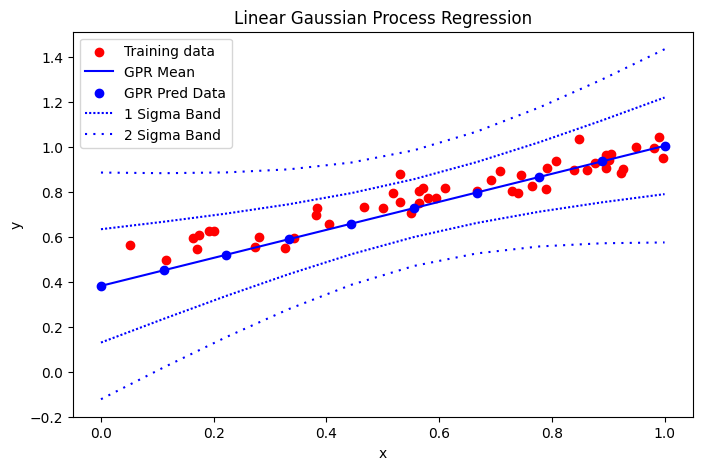

In [314]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='red', label='Training data')
plt.plot(X_test, y_pred, color='blue', label='GPR Mean')
plt.scatter(X_test, y_pred, color='blue', label='GPR Pred Data')
plt.plot(X_test, y_pred - 1 * sigma_pred, linestyle=(0,(1,1)), color='blue', label='1 Sigma Band')
plt.plot(X_test, y_pred + 1 * sigma_pred, linestyle=(0,(1,1)), color='blue')
plt.plot(X_test, y_pred - 2 * sigma_pred, linestyle=(0,(1,3)), color='blue', label='2 Sigma Band')
plt.plot(X_test, y_pred + 2 * sigma_pred, linestyle=(0,(1,3)), color='blue')
plt.title('Linear Gaussian Process Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()